In [3]:
print("Merhaba Veri yapıları ve Algoritmalar / Ders 18")

Merhaba Veri yapıları ve Algoritmalar / Ders 18


In [4]:
import sys # import python programlama dilinde yazılıma kütüphane eklemeye yarayan bir kod blogudur.
print(sys.version)

3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [5]:
from google.colab import drive # google colab - drive bağlantısı
drive.mount ('/content/drive')

Mounted at /content/drive


In [6]:
import os
os.chdir('/content/drive')
!pwd # bize kodun çıktısını dosya yolu olarak veren kod blogudur.

/content/drive


In [7]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np

from urllib.request import urlopen
from bs4 import BeautifulSoup

link_bilgisi = "https://www.tcmb.gov.tr/kurlar/today.xml"
gelen_yanit =requests.get(url=link_bilgisi)

print(gelen_yanit.text)

<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="isokur.xsl"?>
<Tarih_Date Tarih="27.01.2026" Date="01/27/2026"  Bulten_No="2026/18" >
	<Currency CrossOrder="0" Kod="USD" CurrencyCode="USD">
			<Unit>1</Unit>
			<Isim>ABD DOLARI</Isim>
			<CurrencyName>US DOLLAR</CurrencyName>
			<ForexBuying>43.3158</ForexBuying>
			<ForexSelling>43.3939</ForexSelling>
			<BanknoteBuying>43.2855</BanknoteBuying>
			<BanknoteSelling>43.4590</BanknoteSelling>
			<CrossRateUSD/>
			<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="1" Kod="AUD" CurrencyCode="AUD">
			<Unit>1</Unit>
			<Isim>AVUSTRALYA DOLARI</Isim>
			<CurrencyName>AUSTRALIAN DOLLAR</CurrencyName>
			<ForexBuying>29.9098</ForexBuying>
			<ForexSelling>30.1049</ForexSelling>
			<BanknoteBuying>29.7722</BanknoteBuying>
			<BanknoteSelling>30.2855</BanknoteSelling>
				<CrossRateUSD>1.4448</CrossRateUSD>
				<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="2" Kod="DKK" CurrencyCode="DKK">
			<Unit>

In [8]:
tree = ET.parse(urlopen(link_bilgisi))
root = tree.getroot()
liste = []
liste.append(root.findall('Currency')) # Corrected 'currency' to 'Currency'

In [9]:
for i in liste[0]:
  currencyCode = i.get('Kod')
  banknoteBuying = i.find("BanknoteSelling").text
  banknoteSelling = i.find("BanknoteBuying").text

  if currencyCode == "USD":
    print(currencyCode, banknoteBuying, banknoteSelling)
    result = float(banknoteBuying) - float(banknoteSelling)
    print("USD Banka Alış Satış Arasındaki Kur Farkı ->", result)

  if currencyCode == "EUR":
    print(currencyCode, banknoteBuying, banknoteSelling)
    result = float(banknoteBuying) - float(banknoteSelling)
    print("EUR Banka Alış Satış Arasındaki Kur Farkı ->", result)

USD 43.4590 43.2855
USD Banka Alış Satış Arasındaki Kur Farkı -> 0.1735000000000042
EUR 51.6213 51.4153
EUR Banka Alış Satış Arasındaki Kur Farkı -> 0.20599999999999596


<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="isokur.xsl"?>
<Tarih_Date Tarih="27.01.2026" Date="01/27/2026"  Bulten_No="2026/18" >
	<Currency CrossOrder="0" Kod="USD" CurrencyCode="USD">
			<Unit>1</Unit>
			<Isim>ABD DOLARI</Isim>
			<CurrencyName>US DOLLAR</CurrencyName>
			<ForexBuying>43.3158</ForexBuying>
			<ForexSelling>43.3939</ForexSelling>
			<BanknoteBuying>43.2855</BanknoteBuying>
			<BanknoteSelling>43.4590</BanknoteSelling>
			<CrossRateUSD/>
			<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="1" Kod="AUD" CurrencyCode="AUD">
			<Unit>1</Unit>
			<Isim>AVUSTRALYA DOLARI</Isim>
			<CurrencyName>AUSTRALIAN DOLLAR</CurrencyName>
			<ForexBuying>29.9098</ForexBuying>
			<ForexSelling>30.1049</ForexSelling>
			<BanknoteBuying>29.7722</BanknoteBuying>
			<BanknoteSelling>30.2855</BanknoteSelling>
				<CrossRateUSD>1.4448</CrossRateUSD>
				<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="2" Kod="DKK" CurrencyCode="DKK">
			<Unit>

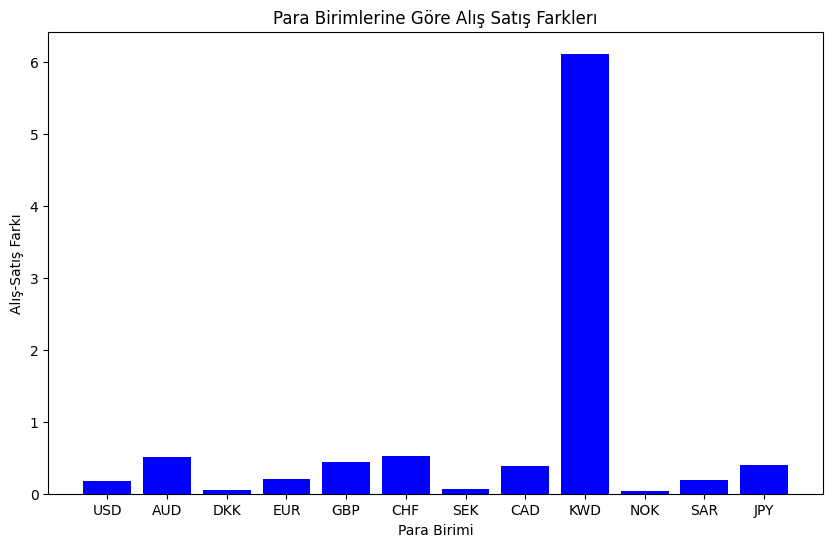

In [10]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np

from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

#Veri kaynağının linki
baglanti_adresi = "https://www.tcmb.gov.tr/kurlar/today.xml"

#Web sitesinden XML verisini alıyoruz
gelen_veri = requests.get(url=baglanti_adresi)
print(gelen_veri.text) #verinin içeriğini kontrol amaçlı yazdrıyoruz.

#XML verisin parse (çözümleme) ediyoruz.
tree = ET.parse(urlopen(baglanti_adresi))
root = tree.getroot()

#Para birimlerini saklayacağımız listeyi oluşturuyoruz.
para_birimleri=[]

#Tüm para birimlerini bulup lsiteye ekliyoruz.
para_birimleri.append(root.findall('Currency')) # FIX: Corrected 'currency' to 'Currency'

#Para birimleri üzerindedöngü ile işlem yapıyoruz.
for i in para_birimleri[0]:
  paraBirimiKodu = i.get('Kod') #Para birimi kodunu alıyoruz.

  # Robustly get banknote buying and selling prices for the first print block
  banknoteBuying_element_first_loop = i.find("BanknoteBuying") # FIX: Corrected element name case
  banknoteSelling_element_first_loop = i.find("BanknoteSelling") # FIX: Corrected element name case

  # Handle potentially missing elements or empty text
  banknoteBuying_str_first_loop = banknoteBuying_element_first_loop.text if banknoteBuying_element_first_loop is not None and banknoteBuying_element_first_loop.text is not None else ''
  banknoteSelling_str_first_loop = banknoteSelling_element_first_loop.text if banknoteSelling_element_first_loop is not None and banknoteSelling_element_first_loop.text is not None else ''

  #USD için işlem yapıyoruz.
  if paraBirimiKodu == "USD":
    print(f"Currency: {paraBirimiKodu}, Banknote Buying: {banknoteBuying_str_first_loop}, Banknote Selling: {banknoteSelling_str_first_loop}")
    try:
        # 'Alış-Satış' difference implies Selling - Buying
        fark = float(banknoteSelling_str_first_loop) - float(banknoteBuying_str_first_loop)
        print("USD banka alış satış arasındaki kur farkı ->", fark)
    except ValueError:
        print(f"Could not calculate difference for USD due to invalid numeric values: Buying='{banknoteBuying_str_first_loop}', Selling='{banknoteSelling_str_first_loop}'")

#Verileri pandas dataFrame olarak saklama
veri = {
    'Para Birimi':[],
    'Alış Fiyatı':[],
    'Satış Fiyatı':[],
    'Fark': []
}

for i in para_birimleri[0]:
  paraBirimiKodu = i.get('Kod')

  # Robustly get banknote buying and selling prices for DataFrame population
  banknoteBuying_element = i.find("BanknoteBuying") # FIX: Corrected typo 'banlnoteBuying' to 'BanknoteBuying'
  banknoteSelling_element = i.find("BanknoteSelling") # FIX: Corrected element name case

  # Handle potentially missing elements or empty text
  buying_price_str = banknoteBuying_element.text if banknoteBuying_element is not None and banknoteBuying_element.text is not None else ''
  selling_price_str = banknoteSelling_element.text if banknoteSelling_element is not None and banknoteSelling_element.text is not None else ''

  if buying_price_str and selling_price_str: # Check if both are non-empty before converting
    buying_price = float(buying_price_str)
    selling_price = float(selling_price_str)
    fark = selling_price - buying_price
    veri['Para Birimi'].append(paraBirimiKodu)
    veri['Alış Fiyatı'].append(buying_price)
    veri['Satış Fiyatı'].append(selling_price)
    veri['Fark'].append(fark)

df = pd.DataFrame(veri)

#Pandas DataFrame verilerini görselleştirme
plt.figure(figsize=(10, 6))
plt.bar(df['Para Birimi'], df['Fark'], color='blue') # FIX: Corrected 'Para Bİrimi' to 'Para Birimi'
plt.xlabel('Para Birimi')
plt.ylabel('Alış-Satış Farkı')
plt.title('Para Birimlerine Göre Alış Satış Farklerı')
plt.show()

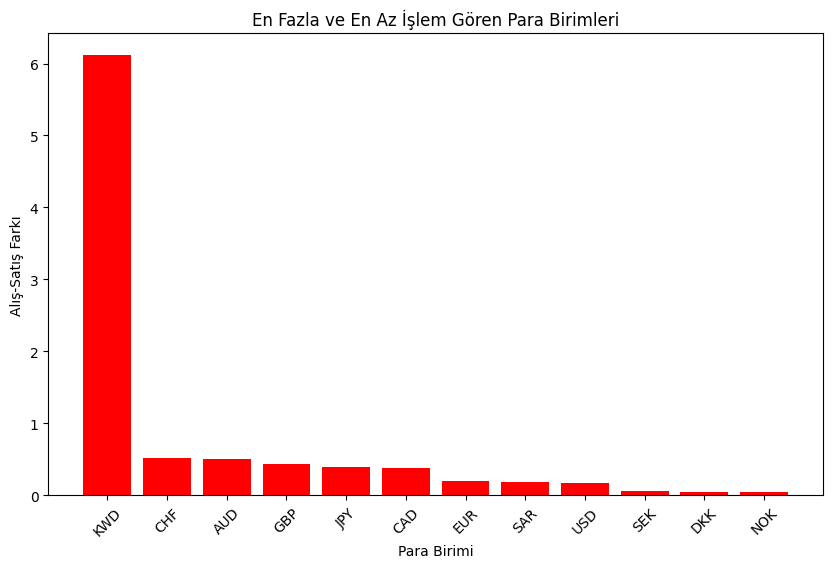

In [11]:
# Verileri alış-satış farkına göre büyükten küçüğe sıralıyoruz
df_sorted = df.sort_values(by='Fark', ascending=False)

# Pandas DataFrame verilerini görselleştirme (Sıralanmış Hali)
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Para Birimi'], df_sorted['Fark'], color='red')
plt.xlabel('Para Birimi')
plt.ylabel('Alış-Satış Farkı')
plt.title('En Fazla ve En Az İşlem Gören Para Birimleri')
plt.xticks(rotation=45)  # Para birimi isimlerinin daha iyi görünmesi için
plt.show()

In [12]:
# CSV dosyasına kaydetme

# Save to a specific location within MyDrive
df_sorted.to_csv('/content/drive/MyDrive/kur_verileri_siralama-30042025.csv', index=False)

print("Veriler '/content/drive/MyDrive/kur_verileri_siralama-30042025.csv' dosyasına kaydedildi.")

Veriler '/content/drive/MyDrive/kur_verileri_siralama-30042025.csv' dosyasına kaydedildi.


In [13]:
import requests

def hava_durumu_bilgisi_al(sehir, api_anahtari):
    # Doğru URL ve API endpointi (ücretsiz sürüm için)
    base_url = "https://api.openweathermap.org/data/2.5/weather"

    # API'ye gönderilecek parametreler (şehir adı, API anahtarı ve metrik sistem)
    params = {"q": sehir, "appid": api_anahtari, "units": "metric"}

    try:
        # API'ye GET isteği gönderme
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Hata durumunda isteği durdur

        # Cevaptan JSON verisini alma
        hava_durumu = response.json()

        # JSON verisini işleme örnekleri
        print("Hava Durumu Bilgisi - " + sehir)
        print("Sıcaklık: " + str(hava_durumu['main']['temp']) + " °C")
        print("Nem Oranı: " + str(hava_durumu['main']['humidity']) + "%")
        print("Açıklama: " + hava_durumu['weather'][0]['description'])

    except requests.exceptions.RequestException as err:
        print("Hata oluştu: " + str(err))

if __name__ == "__main__":
    # Kullanıcıdan şehir adı ve API anahtarı alınması
    sehir_adı = input("Hava durumu bilgisini almak istediğiniz şehir adını girin: ")
    # Re-prompt for API key
    api_key = input("OpenWeatherMap API anahtarınızı girin: ") # API KEY sizin OpenWeatherMap üyeliğiniz sonrasında oluşturulan anahtardır.

    # Hava durumu bilgilerini alma fonksiyonunu çağırma
    hava_durumu_bilgisi_al(sehir_adı, api_key)


Hava durumu bilgisini almak istediğiniz şehir adını girin: istanbul
OpenWeatherMap API anahtarınızı girin: 959c8f506746cdb1fb932da433665cb6
Hava Durumu Bilgisi - istanbul
Sıcaklık: 12.31 °C
Nem Oranı: 58%
Açıklama: broken clouds


Hava Durumu Bilgisi - London
Sıcaklık: 8.79 °C
Nem Oranı: 92%
Açıklama: scattered clouds


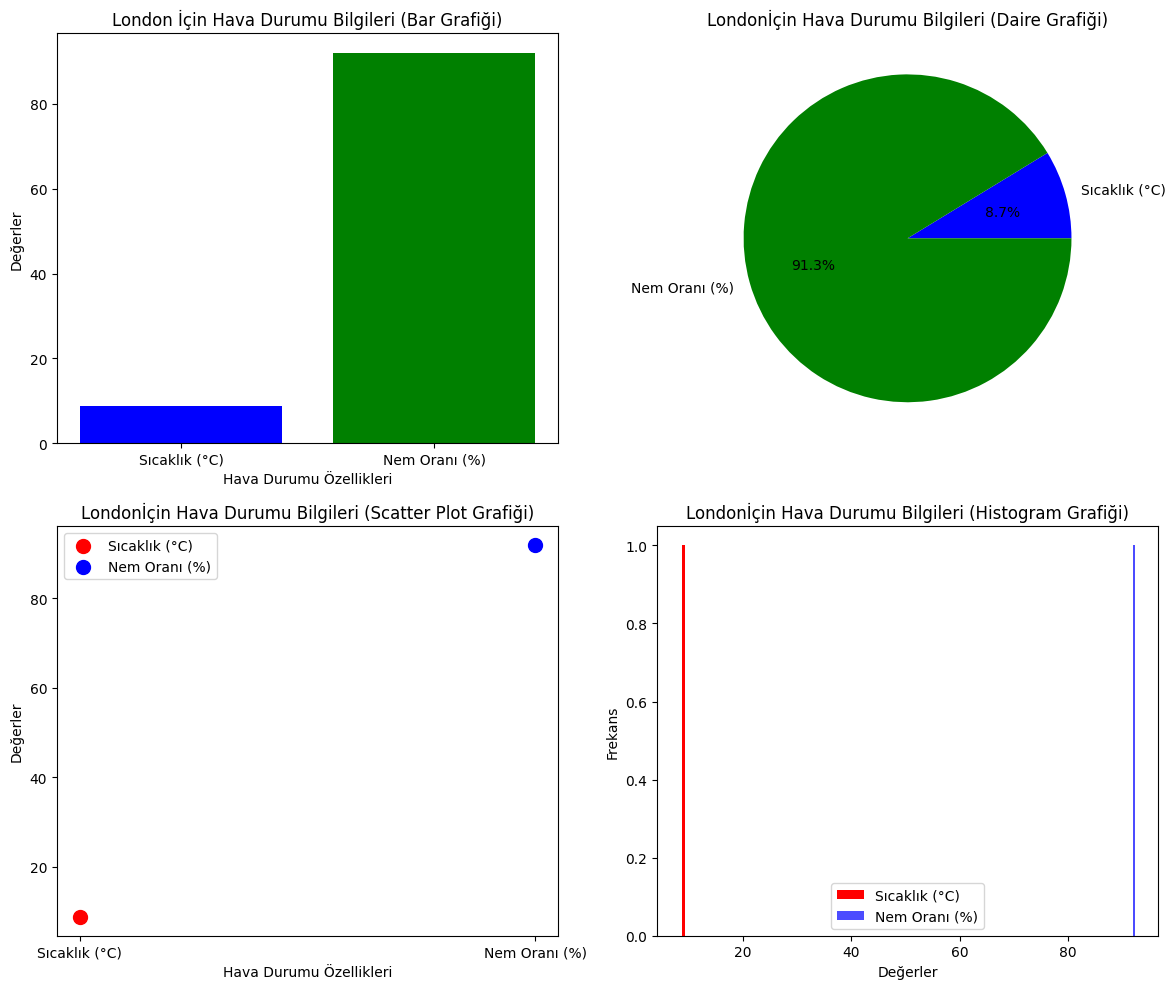

In [14]:
# pip install requests, matplotlib

import requests
import matplotlib.pyplot as plt

def hava_durumu_bilgisi_al(sehir, api_anahtari):
    # Doğru URL ve API endpointi
    base_url = "https://api.openweathermap.org/data/2.5/weather"

    # API'ye gönderilecek parametreler
    params = {"q": sehir, "appid": api_anahtari, "units": "metric"}

    try:
        # API'ye GET isteği gönderme
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Hata durumunda isteği durdur

        # Cevaptan JSON verisini alma
        hava_durumu = response.json()

        # JSON verisini işleme
        print("Hava Durumu Bilgisi - " + sehir)
        print("Sıcaklık: " + str(hava_durumu['main']['temp']) + " °C")
        print("Nem Oranı: " + str(hava_durumu['main']['humidity']) + "%")
        print("Açıklama: " + hava_durumu['weather'][0]['description'])

        # Hava durumu verilerini bir dictionary'de saklıyoruz
        veri = {
            "Sıcaklık (°C)": hava_durumu['main']['temp'],
            "Nem Oranı (%)": hava_durumu['main']['humidity']
        }

        # Bar Grafiği
        plt.figure(figsize=(12, 10))

        plt.subplot(2, 2, 1)  # 2x2 grid, 1. grafik
        plt.bar(veri.keys(), veri.values(), color=['blue', 'green'])
        plt.xlabel('Hava Durumu Özellikleri')
        plt.ylabel('Değerler')
        plt.title(sehir + " İçin Hava Durumu Bilgileri (Bar Grafiği)")

        # Daire Grafiği (Pie Chart)
        plt.subplot(2, 2, 2)  # 2x2 grid, 2. grafik
        plt.pie(veri.values(), labels=veri.keys(), autopct='%1.1f%%', colors=['blue', 'green'])
        plt.title(sehir + "İçin Hava Durumu Bilgileri (Daire Grafiği)")

        # Scatter Plot (Dağılım Grafiği) - İki Farklı Renk
        plt.subplot(2, 2, 3)  # 2x2 grid, 3. grafik
        plt.scatter(['Sıcaklık (°C)'], [veri['Sıcaklık (°C)']], color='red', s=100, label='Sıcaklık (°C)')
        plt.scatter(['Nem Oranı (%)'], [veri['Nem Oranı (%)']], color='blue', s=100, label='Nem Oranı (%)')
        plt.xlabel('Hava Durumu Özellikleri')
        plt.ylabel('Değerler')
        plt.title(sehir + "İçin Hava Durumu Bilgileri (Scatter Plot Grafiği)")
        plt.legend()

        # Histogram - Ayrı Ayrı Gösterim
        plt.subplot(2, 2, 4)  # 2x2 grid, 4. grafik
        plt.hist([veri['Sıcaklık (°C)']], bins=2, color='red', label='Sıcaklık (°C)')
        plt.hist([veri['Nem Oranı (%)']], bins=2, color='blue', label='Nem Oranı (%)', alpha=0.7)
        plt.xlabel('Değerler')
        plt.ylabel('Frekans')
        plt.title(sehir + "İçin Hava Durumu Bilgileri (Histogram Grafiği)")
        plt.legend()

        plt.tight_layout()
        plt.show()

    except requests.exceptions.RequestException as err:
        print(f"Hata oluştu: {err}")

if __name__ == "__main__":
    # Kullanıcıdan şehir adı ve API anahtarı alınması
    sehir_adı = "London"
    api_key = "959c8f506746cdb1fb932da433665cb6"

    # Hava durumu bilgilerini alma ve görselleştirme fonksiyonunu çağırma
    hava_durumu_bilgisi_al(sehir_adı, api_key)
    api_key = "959c8f506746cdb1fb932da433665cb6"


In [15]:
print(api_key)

959c8f506746cdb1fb932da433665cb6
